# Leaky Integrate and Fire neuron
with refactory period

modified from http://neuronaldynamics.epfl.ch
and [Neuromatch Academy](https://github.com/NeuromatchAcademy/course-content/blob/master/tutorials/W2D3_BiologicalNeuronModels/solutions/W2D3_Tutorial1_Solution_60a1e954.py)

In [1]:
import matplotlib.pyplot as plt

mv = 0.001
ms = 0.001
mmo = 0.001
na = 1E-9
megohm = 1E6

  # typical neuron parameters#
threshold = -50 * mv     # spike threshold [mV]
reset_voltage = -65 * mv  # reset potential [mV]
tau_m = 8. * ms     # membrane time constant [ms]
membrane_resistance = 10 * megohm    # membrane resistance [MOhm]
initial_potential = -75 * mv   # initial potential [mV]
resting_potential = -70 * mv      # resting potential [mV]
refactory_period = 3. * ms      # refractory time (ms)
I = 2.1 * na

  # simulation parameters #
dt = 0.1 * ms  # Simulation time step [ms]
R_DUR = int(refactory_period / dt)

In [2]:
def step(v, tr, injected_current):
    spiking = False
    if tr > 0:
        next_v = reset_voltage
        tr = tr - 1
    elif v > threshold:
        next_v = reset_voltage
        tr = int(refactory_period / dt)
        spiking = True
    else:
        dv = ((resting_potential - v) + (injected_current * membrane_resistance)) * (dt / tau_m)
        next_v = v + dv
    return next_v, tr, spiking

In [6]:
%%timeit -n 10 -r 10
steps = 2000
traces = steps*[0.0]
v = initial_potential
for i in range(steps):
    traces[i] = v / mv
    v, tr, spike = step(v, 0, I)

2.74 ms ± 87 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [5]:
2960/2000

1.48

So *a singe step for a singe neuron* takes roughly 2960/2000 = 1.48 µs

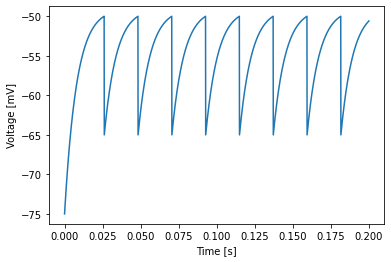

In [12]:
from pylab import arange
import matplotlib.pyplot as plt
steps = 2000
t = arange(0, steps)*dt      #Define the time axis.
i_all = steps * [ I ]
traces = steps*[0.0]
v = initial_potential
for i in range(steps):
    traces[i] = v / mv
    v, tr, spike = step(v, 0, I)
%matplotlib inline
plt.figure() #Plot the results.
plt.plot(t,traces)
plt.xlabel('Time [s]')
plt.ylabel('Voltage [mV]');

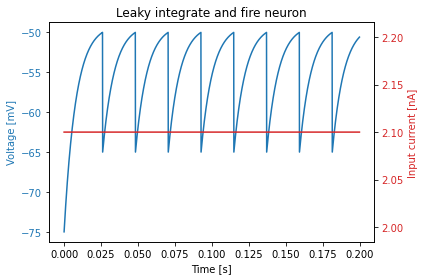

In [13]:
fig, ax1 = plt.subplots()

plt.title('Leaky integrate and fire neuron')
color = 'tab:blue'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [mV]', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(t,traces, color=color)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel('Input current [nA]', color=color)
ax2.plot(t,[i_now / na for i_now in i_all], color= color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()